In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from trajectory import * 
from trajectory.segments import same_sign, ValidationError, SegmentList
from trajectory.plot import * 

In [3]:
def make_sl(moves, a_max=300_000):
    sl = SegmentList([Joint(10000, a_max), Joint(10000, a_max)])

    for move in moves:
        sl.add_distance_segment(move)

    return sl

|0.0333 0.0066 0.0333|[0       167  :     67@10000  :  167   10000] [0       -83  :    -33@5002   :  -83    6000]
                      [0      33.3  :     6.600     : 33.3   10000] [0      25.8  :     0.000     : 25.8    6000]
|0.0333 0.0666 0.0333|[10000   306  :    555@8342   :  139       0] [6000    250  :    600@9005   :  150       0]
                      [10000  33.3  :    66.600     : 33.3       0] [10000  33.3  :    66.600     : 33.3       0]


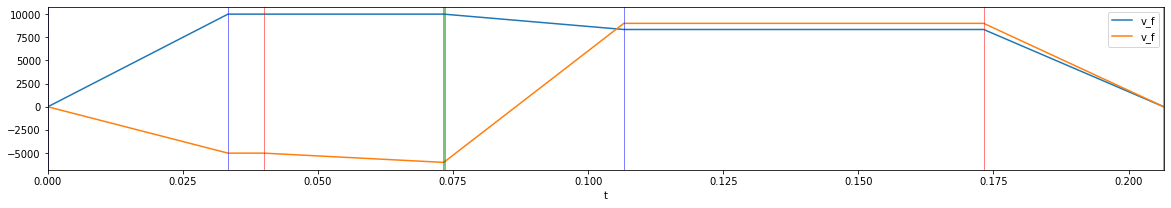

In [4]:

sl=make_sl(([400.0,-200.0],  [1000,   1000]))

print(sl.debug_str())
plot_segment_list(sl.dataframe)

|0.0333 0.0666 0.0333|[0      -167  :   -667@10000  : -167       0] [0        0   :      0@0      :   0        0]
                      [10000  33.3  :    66.600     : 33.3   10000] [0       0.0  :     0.000     :  0.0       0]
|0.0058 0.0000 0.0058|[0        5   :      0@1722   :   5        0] [0        5   :      0@1722   :   5        0]
                      [0       5.8  :     0.000     :  5.8       0] [0       5.8  :     0.000     :  5.8       0]


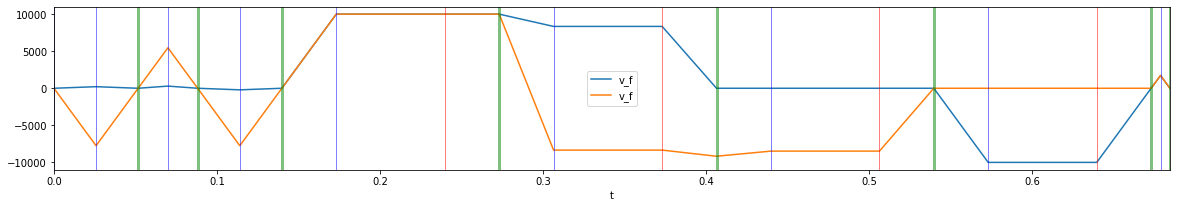

In [5]:
moves = (
    [5.0,-200.0],
    [5.0,100.0],
    [-5.0,-200.0],
    [1000,   1000],
    [1000 , -1000],
    [0    , -1000],
    [-1000,     0],
    [10,    10]
)


sl=make_sl(moves, 300_000)

print(sl.debug_str())
plot_segment_list(sl.dataframe)



|0.1000 0.9000 0.1000|[97500  9631  :  85613@95125  : 4756   97562] [0       250  :   4500@5000   :  250       0]
                      [100000 100.0 :    900.000    : 100.0 100000] [0      70.7  :     0.000     : 70.7   50000]
|0.1000 0.9000 0.1000|[97562  9634  :  85610@95122  : 4756       0] [0       250  :   4500@5000   :  250       0]
                      [100000 100.0 :    900.000    : 100.0      0] [0      70.7  :     0.000     : 70.7       0]
6 2


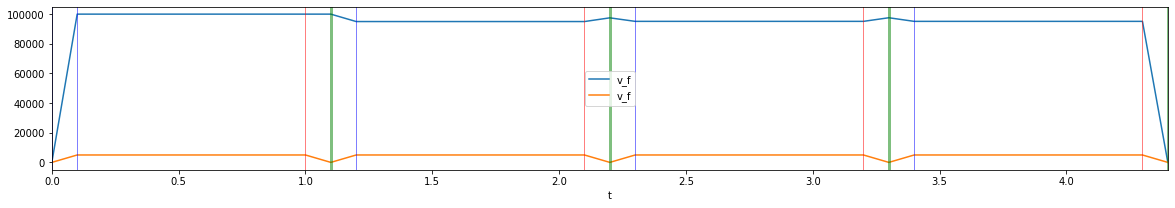

In [6]:
sl = SegmentList([Joint(100000, 1000_000), Joint(100000, 1000_000)])
for i in range(4):
    
    sl.add_distance_segment([100_000, 5_000])

sl.validate()
print(sl.debug_str())
plot_segment_list(sl.dataframe)
print(len(sl._sub_segments), len(sl.segments))

|0.1000 0.9000 0.1000|[97500  9631  :  85613@95125  : 4756   97562] [0       250  :   4500@5000   :  250       0]
                      [100000 100.0 :    900.000    : 100.0 100000] [0      70.7  :     0.000     : 70.7   50000]
|0.1000 0.9000 0.1000|[97562  9634  :  85610@95122  : 4756       0] [0       250  :   4500@5000   :  250       0]
                      [100000 100.0 :    900.000    : 100.0      0] [0      70.7  :     0.000     : 70.7       0]


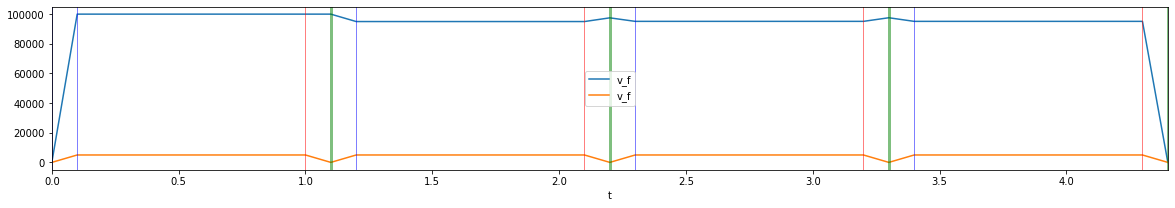

In [7]:
sl = SegmentList([Joint(100000, 1000_000), Joint(100000, 1000_000)])
for i in range(4):
    sl.add_distance_segment([100_000,5_000])

sl.validate()
print(sl.debug_str())
plot_segment_list(sl.dataframe)

|0.3333 0.6667 0.3333|[0      16667 :  66667@100000 : 16667 100000] [0      1667  :   6667@10000  : 1667       0]
                      [0      333.3 :    666.660    : 333.3 100000] [0      182.6 :     0.000     : 182.6  30000]
|0.3333 0.6667 0.3333|[100000 30556 :  55555@83334  : 13889      0] [0      1667  :   6667@10000  : 1667       0]
                      [100000 333.3 :    666.660    : 333.3      0] [0      182.6 :     0.000     : 182.6      0]


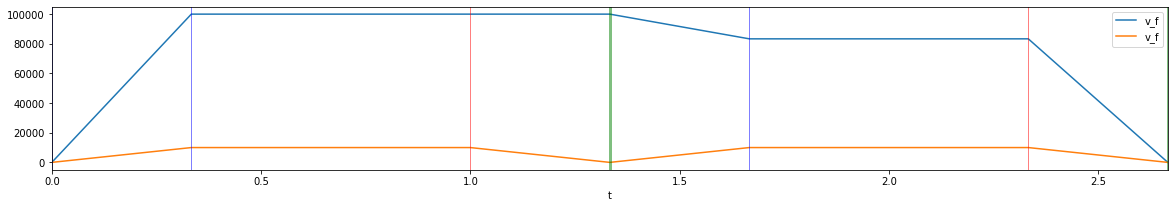

In [8]:
sl = SegmentList([Joint(100000, 300_000, 300_000), Joint(100000, 300_000, 300_000)])
for i in range(2):
    sl.add_distance_segment([100_000, 10_000])

sl.validate()
print(sl.debug_str())
plot_segment_list(sl.dataframe)

In [9]:
from random import randint
from trajectory.segments import ConvergenceError

joints = [Joint(10000, 300_000, 300_000), Joint(7500, 300_000, 300_000), Joint(30000, 300_000, 300_000)]
sl = SegmentList(joints)

moves = []

def rand_segment(sl):
    m = (randint(0,joints[0].v_max), randint(0,joints[1].v_max), randint(0,joints[2].v_max))
    sl.add_distance_segment(m)

        
def rand_segment_2(sl): # Allows negative moves
    m = (randint(-joints[0].v_max,joints[0].v_max), 
         randint(-joints[1].v_max,joints[1].v_max), 
         randint(-joints[2].v_max,joints[2].v_max))
    sl.add_distance_segment(m)
  

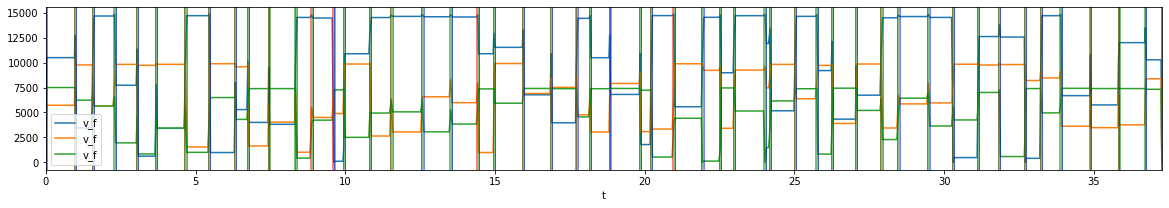

In [10]:
joints = [Joint(15000, 300_000, 300_000), Joint(10000, 300_000, 300_000), Joint(7500, 300_000, 300_000)]
sl = SegmentList(joints)

for i in range(50):
    rand_segment(sl)
    
plot_segment_list(sl.dataframe)    

In [ ]:
rows = []

def v_mean(js):
    return js.x/js.segment.t

def v_mean_mean_p(js):
    return (v_mean(js) + v_mean(js.prior_js))/2

def v_mean_mean_n(js):
    return (v_mean(js) + v_mean(js.next_js))/2

for seg in list(sl)[1:-1]:
    js = seg.joint_segments[1]
    rows.append([js.v_0, js.v_0_max , js.x, js.v_c, js.segment.t, js.v_1, js.v_1_max])
   
df = pd.DataFrame(rows, columns='v_0 v_0_max x v_c t v_1 v_1_max'.split())

df.plot.scatter(x='x',y='v_1_max')

In [ ]:
df.v_0_max.describe()

In [24]:
%%time
sl2 = SegmentList(joints)

for i in range(500):
    rand_segment_2(sl2)
    
#plot_segment_list(sl2.dataframe)   

CPU times: user 120 ms, sys: 1.28 ms, total: 122 ms
Wall time: 121 ms


In [ ]:
plot_segment_list(sl2.dataframe)    

In [25]:
121 / 500


0.242

In [ ]:
sl=make_sl(([20000,50],[10,20000], [20000,50]))

print(sl.debug_str())
#print(sl.segments[1].joint_segments[0].x_c)
plot_segment_list(sl.dataframe)

In [ ]:
sl=make_sl(([20000,50],[10,20000], [20000,50]))
for i, seg in enumerate(sl):
    js = seg.joint_segments[0]
    
    
    
    print(i, js, js.debug_str(), v_0_max, v_1_max)
        
        
plot_segment_list(sl.dataframe)        